# Simulation experiment for detection thresholds for variant calling

This notebook is to get detection thresholds for the limit of the variant calling based on: 

1. Read depth
2. Error rate
3. Number of mutations

The data from this comes from: https://pubs.acs.org/doi/10.1021/acscentsci.7b00548 Ape AGW


In [1]:
import pandas as pd
# Visualisation things to make the figures look nice
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sciutil import SciUtil


data_dir = 'ePCR_data/'
fig_dir = 'ePCR_figures/'


plt.rcParams['svg.fonttype'] = 'none'
axis_line_width = 1.0
axis_font_size = 12
title_font_size = 12
label_font_size = 10
figsize = (2.5, 3) # Figure size
font = 'Arial'
style = 'ticks'
font_family = 'sans-serif'

# Create a figure with 2x2 subplots
cmap = 'viridis'
palette = sns.color_palette("viridis", as_cmap=True)
sns.set_palette(cmap)

sns.set(rc={'figure.figsize': figsize, 'font.family': font_family,
            'font.sans-serif': font, 'font.size': label_font_size}, style=style)
sns.set_style("ticks")

def set_ax_params(ax):
    ax.tick_params(direction='out', length=2, width=axis_line_width)
    ax.spines['bottom'].set_linewidth(axis_line_width)
    ax.spines['top'].set_linewidth(0)
    ax.spines['left'].set_linewidth(axis_line_width)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(labelsize=axis_font_size)
    ax.tick_params(axis='x', which='major', pad=2.0)
    ax.tick_params(axis='y', which='major', pad=2.0)
    ax.tick_params(labelsize=label_font_size)


u = SciUtil()

# Generate mutations on a "real" sequence
# Decided to choose tauD from Ecoli K12
parent_sequence_aa = 'MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEKDVMYLKKACDVLKDQVDEILDLAGGWVASNEHLIYYFSNPDTGEPIKEYLERVRARFGAWILDTTCRDYNREWLDYQYEVGLRHHRSKKGVTDGVRTVPHIPLRYLIAWIYPITATIKPFLAKKGGSPEDIEGMYNAWFKSVVLQVAIWSHPYTKENDWLEHHHHHH*'

parent_sequence = 'ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGAAGTCACCCATCACGGACCTTGAGTTTGACCTTCTGAAGAAGACTGTCATGTTAGGTGAAAAGGACGTAATGTACTTGAAAAAGGCGTGTGACGTTCTGAAAGATCAAGTTGATGAGATCCTTGACTTGGCGGGTGGTTGGGTAGCATCAAATGAGCATTTGATTTATTACTTCTCCAATCCGGATACAGGAGAGCCTATTAAGGAATACCTGGAACGTGTACGCGCTCGCTTTGGAGCCTGGATTCTGGACACTACCTGCCGCGACTATAACCGTGAATGGTTAGACTACCAGTACGAAGTTGGGCTTCGTCATCACCGTTCAAAGAAAGGGGTCACAGACGGAGTACGCACCGTGCCCCATATCCCACTTCGTTATCTTATCGCATGGATCTATCCTATCACCGCCACTATCAAGCCATTTTTGGCTAAGAAAGGTGGCTCTCCGGAAGACATCGAAGGGATGTACAACGCTTGGTTCAAGTCTGTAGTTTTACAAGTTGCCATCTGGTCACACCCTTATACTAAGGAGAATGACTGGCTCGAGCACCACCACCACCACCACTGA'

# Introduce mutations at a given frequency and an error rate

Test setup:

Change to 0.1 - 5% 0.2% step size. 

1. For number of mutations from 1 to the sequence length test mutating each one and correlate this to the p value
2. For sequencing error rates from 0 to 100% make sequences ranging with this and see what the results are for the p value and the error
3. For different sequence lengths also check how sequence length corresponds to the pvalue

In [5]:
from minION import *
from tqdm import tqdm

label = 'ApeAGW'

In [6]:
significance = -1*np.log10(0.001)

## Experiment 1: Varying the sequencing error rate for a single mutation

/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_95917/2958729570.py:2: RuntimeWarning: divide by zero encountered in log10
  experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)


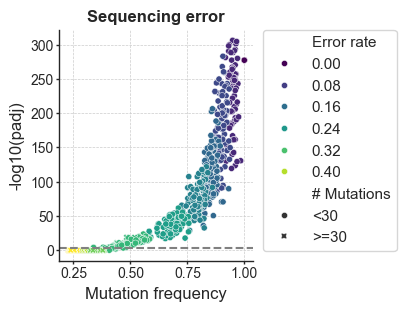

In [8]:

experiment_df = pd.read_csv(f'{data_dir}Experiment1.csv')
experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df['Error rate'] = [int(c.split('_')[-1])/100.0 for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(v.split('_')) for v in experiment_df['Variant'].values]
experiment_df['# Mutations'] = [f'<30' if v < 30 else f'>=30' for v in experiment_df['# Mutations']]
experiment_df = experiment_df.reset_index()
ax = sns.scatterplot(experiment_df, x='frequency', y='-log10(P.adj)', hue='Error rate', palette='viridis', 
                    style="# Mutations", style_order=['<30', '>=30'], s=20)
set_ax_params(ax)
plt.xlabel('Mutation frequency')
plt.ylabel('-log10(padj)')
plt.title('Sequencing error', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.savefig(f'{fig_dir}Experiment1_{label}.svg')
plt.show()

/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_95917/2510296329.py:2: RuntimeWarning: divide by zero encountered in log10
  experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)


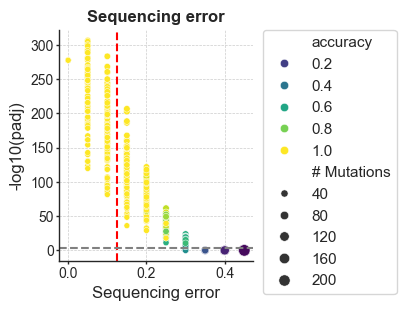

In [9]:

experiment_df = pd.read_csv(f'{data_dir}Experiment1.csv')
experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df['Error rate'] = [int(c.split('_')[-1])/100.0 for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(v.split('_')) for v in experiment_df['Variant'].values]
#experiment_df['# Mutations'] = [f'{v}' if v < 5 else f'>=5' for v in experiment_df['# Mutations']]
experiment_df = experiment_df.reset_index()
ax = sns.scatterplot(experiment_df, x='Error rate', y='-log10(P.adj)', hue='accuracy', palette='viridis', 
                     size="# Mutations")
set_ax_params(ax)
plt.xlabel('Sequencing error')
plt.ylabel('-log10(padj)')
plt.title('Sequencing error', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axvline(x = 0.125, color = 'red', linestyle = '--') #axis='y', 

plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.savefig(f'{fig_dir}Experiment1_version2_{label}.svg')
plt.show()

In [10]:
experiment_df

,level_0,index,Plate,Well,Path,Alignment_count,P value,Mixed Well,Variant,mutation,frequency,P adj.,True Variant,correct,incorrect,accuracy,-log10(P.adj),Error rate,# Mutations
0,0,0,SeqError_0,Well 0,NaN,25,0.000000e+00,False,G36T_C53T_A62C_T80G_A94G_A125G_C176G_G177T_G32...,NaN,1.000000,0.000000e+00,ATGACTCCCTCGGACATCCCGGGATATGATTATGGTCGTGTCGAGA...,19,0,1.000000,inf,0.00,19
1,1,1,SeqError_0,Well 1,NaN,25,0.000000e+00,False,C59G_C76G_T95C_A147T_G240T_C302T_A550C_C606G,NaN,1.000000,0.000000e+00,ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...,8,0,1.000000,inf,0.00,8
2,2,2,SeqError_0,Well 2,NaN,25,0.000000e+00,False,C52G_A68G_C89G_T92C_T95C_A128T_A232C_T246C_G35...,NaN,1.000000,0.000000e+00,ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...,18,0,1.000000,inf,0.00,18
3,3,3,SeqError_0,Well 3,NaN,25,0.000000e+00,False,C142T_G178T_A260T_C268G_C284A_G288T_T290A_C318...,NaN,1.000000,0.000000e+00,ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...,10,0,1.000000,inf,0.00,10
4,4,4,SeqError_0,Well 4,NaN,25,6.353605e-278,False,C42G_G294T_T304C_T392G_C394T_G535T,NaN,1.000000,6.353605e-278,ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTGGAGA...,6,0,1.000000,277.19698,0.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,955,91,SeqError_45,Well 91,NaN,25,1.000000e+00,False,T6G_A16C_G23T_A29DEL_T30DEL_A32DEL_G34C_G35A_C...,NaN,0.239135,1.000000e+00,ATGACTCCCTCGGACATCCCGGGATATGATTATGAGCGTGTCGAGA...,9,176,0.048649,-0.00000,0.45,185
956,956,92,SeqError_45,Well 92,NaN,25,1.000000e+00,False,A1C_T2A_G3T_C8G_T10A_G12T_C15T_A16G_G22A_T25G_...,NaN,0.248177,1.000000e+00,ATGACTCCCTCTGACATCCCGGGATATGATTATGGGCCTGTCGAGA...,16,165,0.088398,-0.00000,0.45,181
957,957,93,SeqError_45,Well 93,NaN,25,1.000000e+00,False,T2A_A4C_T10DEL_C15T_A16C_C19DEL_C20A_G22A_G23T...,NaN,0.254439,1.000000e+00,ATGACTCCCTCGGACCTCCCGGGATATGTTTATGGGCGTGTCGAGA...,20,185,0.097561,-0.00000,0.45,205
958,958,94,SeqError_45,Well 94,NaN,25,1.000000e+00,False,A1DEL_T2DEL_G3DEL_C9A_T10A_C11G_C15A_T25DEL_A2...,NaN,0.253822,1.000000e+00,ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...,16,175,0.083770,-0.00000,0.45,191


## Experiment 2: varying read depth and it's effect on significance

/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_95917/2615572672.py:2: RuntimeWarning: divide by zero encountered in log10
  experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)


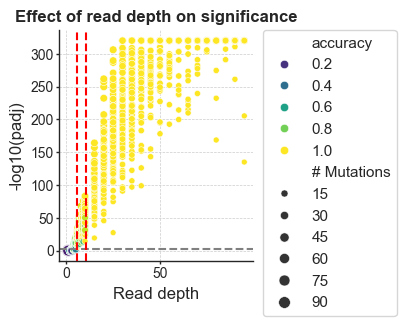

In [19]:
experiment_df = pd.read_csv(f'{data_dir}Experiment2_ReadDepth_{label}.csv')
experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df['Read depth'] = [int(c.split('_')[-1]) for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(v.split('_')) for v in experiment_df['Variant'].values]
experiment_df = experiment_df.reset_index()
experiment_df.replace([np.inf, -np.inf], 320, inplace=True)
ax = sns.scatterplot(experiment_df, x='Read depth', y='-log10(P.adj)', hue='accuracy', palette='viridis', 
                     size="# Mutations")
set_ax_params(ax)
plt.xlabel('Read depth')
plt.ylabel('-log10(padj)')
plt.title('Effect of read depth on significance', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.axvline(x = 5.5, color = 'red', linestyle = '--') #axis='y', 
plt.axvline(x = 10.5, color = 'red', linestyle = '--') #axis='y', 
plt.savefig(f'{fig_dir}Experiment2_{label}.svg')
plt.show()

/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_95917/991662740.py:2: RuntimeWarning: divide by zero encountered in log10
  experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)


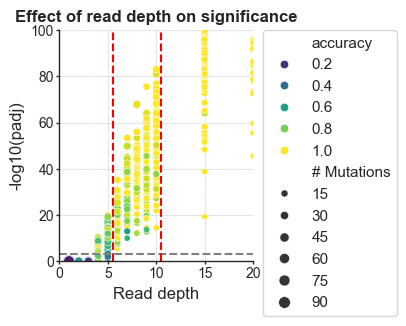

In [18]:
experiment_df = pd.read_csv(f'{data_dir}Experiment2_ReadDepth_{label}.csv')
experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df['Read depth'] = [int(c.split('_')[-1]) for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(v.split('_')) for v in experiment_df['Variant'].values]
experiment_df = experiment_df.reset_index()
experiment_df.replace([np.inf, -np.inf], 320, inplace=True)

ax = sns.scatterplot(experiment_df, x='Read depth', y='-log10(P.adj)', hue='accuracy', palette='viridis', 
                     size="# Mutations")
set_ax_params(ax)
plt.xlabel('Read depth')
plt.ylabel('-log10(padj)')
plt.xlim((0, 20))
plt.ylim((0, 100))

plt.title('Effect of read depth on significance', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.axvline(x = 5.5, color = 'red', linestyle = '--') #axis='y', 
plt.axvline(x = 10.5, color = 'red', linestyle = '--') #axis='y', 

plt.grid(True, which='major', linestyle='--', linewidth=0.5)

plt.savefig(f'{fig_dir}Experiment2_version2_{label}.svg')
plt.show()

In [17]:
# Get for read depth between 0-5, 6-10, 10-20
for read_depth in range(1, 11):
    u.dp(['Read Depth:', read_depth, np.nanmean(experiment_df[experiment_df['Alignment_count'] == read_depth]['accuracy'].values)])

for read_depth in range(10, 90, 10):
    u.dp(['Read Depth:', read_depth, np.nanmean(experiment_df[experiment_df['Alignment_count'] == read_depth]['accuracy'].values)])


--------------------------------------------------------------------------------
                       Read Depth:	1	0.15250588368337156	                       
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                       Read Depth:	2	0.6178126544043688	                        
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                       Read Depth:	3	0.42570686828588095	                       
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                        Read Depth:	4	0.847255392803719	                        
--------------------------------------------------------------------------------
----------------------------

## Experiment 3: effect of sequence length on significance


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_2425/4178922994.py:3: RuntimeWarning: divide by zero encountered in log10
  experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)


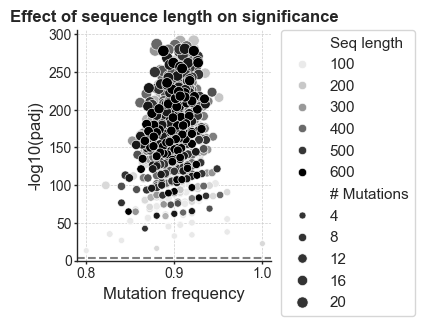

In [65]:
experiment_df = pd.read_csv(f'{data_dir}Experiment3_{label}.csv')

experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df['Seq length'] = [int(c.split('_')[-1]) for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(str(v).split('_')) for v in experiment_df['Variant'].values]
#experiment_df['# Mutations'] = [f'{v}' if v < 5 else f'>=5' for v in experiment_df['# Mutations']]
experiment_df = experiment_df.reset_index()
ax = sns.scatterplot(experiment_df, x='frequency', y='-log10(P.adj)', hue='Seq length', palette='Greys', 
                     size="# Mutations")#
set_ax_params(ax)
plt.xlabel('Mutation frequency')
plt.ylabel('-log10(padj)')
plt.title('Effect of sequence length on significance', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.savefig(f'{fig_dir}Experiment3_{label}.svg')
plt.show()

## Experiment 4: effect of frequency cutoff

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_2425/2873015581.py:3: RuntimeWarning: divide by zero encountered in log10
  experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)


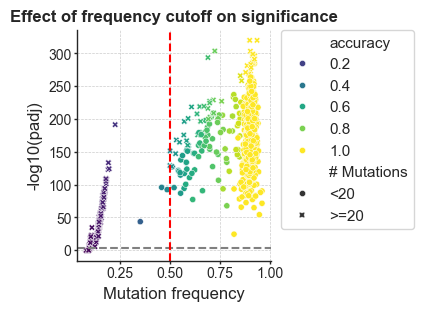

In [62]:
experiment_df = pd.read_csv(f'{data_dir}Experiment4_{label}.csv')

experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df['Freq'] = [int(c.split('_')[-1]) for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(v.split('_')) for v in experiment_df['Variant'].values]
experiment_df['# Mutations'] = [f'<20' if v < 20 else f'>=20' for v in experiment_df['# Mutations']]
experiment_df = experiment_df.reset_index()
experiment_df.replace([np.inf, -np.inf], 320, inplace=True)

ax = sns.scatterplot(experiment_df, x='frequency', y='-log10(P.adj)', hue='accuracy', palette='viridis', 
                     style="# Mutations", style_order=['<20', '>=20'], s=20)
set_ax_params(ax)
plt.xlabel('Mutation frequency')
plt.ylabel('-log10(padj)')
plt.title('Effect of frequency cutoff on significance', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.axvline(x = 0.5, color = 'red', linestyle = '--') #axis='y', 
plt.savefig(f'{fig_dir}Experiment4_{label}.svg')
plt.show()

## Experiment 5: ePCR mutation rate

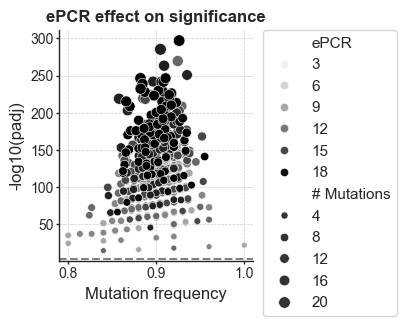

In [63]:
experiment_df = pd.read_csv(f'{data_dir}Experiment5_{label}.csv')
experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df.replace([np.inf, -np.inf], 320, inplace=True)

experiment_df['ePCR'] = [int(c.split('_')[-1]) for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(str(v).split('_')) for v in experiment_df['Variant'].values]
experiment_df = experiment_df.reset_index()
ax = sns.scatterplot(experiment_df, x='frequency', y='-log10(P.adj)', hue='ePCR', palette='Greys', 
                     size="# Mutations")
set_ax_params(ax)
plt.xlabel('Mutation frequency')
plt.ylabel('-log10(padj)')
plt.title('ePCR effect on significance', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.savefig(f'{fig_dir}Experiment5_{label}.svg')
plt.show()

In [5]:
experiment_df

,level_0,index,Plate,Well,Path,Alignment_count,P value,Mixed Well,Variant,mutation,frequency,P adj.,True Variant,correct,incorrect,accuracy,-log10(P.adj),mixedWell,# Mutations
0,0,0,mixedWells_10,Well 0,NaN,25,1.038828e-204,False,A46T_A99T_T188G_T253A_C292G_C306A_A384C_G389A_...,NaN,0.885333,4.533069e-204,ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGT...,15,0,1.0,203.343608,10,15
1,1,1,mixedWells_10,Well 1,NaN,25,4.541209e-175,False,C76G_A82G_C111T_T122C_G132C_G136T_G154A_A158T_...,NaN,0.815000,1.210989e-174,ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...,16,0,1.0,173.916860,10,16
2,2,2,mixedWells_10,Well 2,NaN,25,9.488426e-204,False,A26T_A74T_A128G_A153G_G162C_G175A_A200C_T315G_...,NaN,0.929231,3.960386e-203,ATGACTCCCTCGGACATCCCGGGATTTGATTATGGGCGTGTCGAGA...,13,0,1.0,202.402262,10,13
3,3,3,mixedWells_10,Well 3,NaN,25,7.587977e-164,False,G60T_G61T_G84C_G103T_A192T_G207C_A260G_C272G_T...,NaN,0.834286,1.618768e-163,ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...,14,0,1.0,162.790815,10,14
4,4,4,mixedWells_10,Well 4,NaN,25,8.689744e-220,False,G38T_C52G_G144A_C222T_G263C_T293C_C299T_G346A_...,NaN,0.909333,6.951796e-219,ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCTTGTCGAGA...,15,0,1.0,218.157903,10,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,763,91,mixedWells_80,Well 91,NaN,25,3.466852e-125,False,C53A_A55T_A161T_G169C_G177C_C413T_C429A_G584C,NaN,0.910000,NaN,ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...,8,0,1.0,NaN,80,8
764,764,92,mixedWells_80,Well 92,NaN,25,1.370264e-228,False,T30A_G129A_A147C_G179T_T218C_G275T_T334G_G339A...,NaN,0.897500,NaN,ATGACTCCCTCGGACATCCCGGGATATGAATATGGGCGTGTCGAGA...,16,0,1.0,NaN,80,16
765,765,93,mixedWells_80,Well 93,NaN,25,9.019828e-106,False,G13T_T31G_C53T_G73C_G190T_T347A_C368A,NaN,0.897143,NaN,ATGACTCCCTCGTACATCCCGGGATATGATGATGGGCGTGTCGAGA...,7,0,1.0,NaN,80,7
766,766,94,mixedWells_80,Well 94,NaN,25,1.315888e-181,False,G3A_A83G_T243G_G258C_A296C_G308C_A422C_T483G_A...,NaN,0.906667,NaN,ATAACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...,12,0,1.0,NaN,80,12


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_89252/1187558623.py:3: RuntimeWarning: divide by zero encountered in log10
  experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)


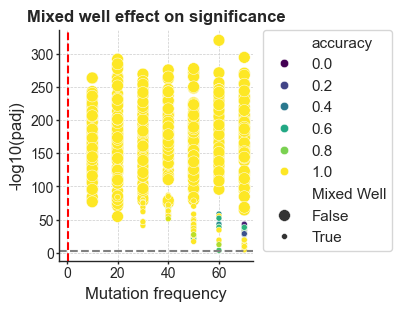

In [12]:
experiment_df = pd.read_csv(f'{data_dir}Experiment6_{label}.csv')

experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df.replace([np.inf, -np.inf], 320, inplace=True)

experiment_df['mixedWell'] = [int(c.split('_')[-1]) for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(str(v).split('_')) for v in experiment_df['Variant'].values]
#experiment_df['# Mutations'] = [f'{v}' if v < 5 else f'>=5' for v in experiment_df['# Mutations']]
experiment_df['Mixed Well'] = [c for c in experiment_df['Mixed Well'].values]

experiment_df = experiment_df.reset_index()
ax = sns.scatterplot(experiment_df, x='mixedWell', y='-log10(P.adj)', hue='accuracy', palette='viridis', 
                     #palette=['grey', 'orange'], 
                     size="Mixed Well")#]# , style_order=['1', '2', '3', '4', '>=5'], s=80)
set_ax_params(ax)
plt.xlabel('Mutation frequency')
plt.ylabel('-log10(padj)')
plt.title('Mixed well effect on significance', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.axvline(x = 0.5, color = 'red', linestyle = '--') #axis='y', 

plt.savefig(f'{fig_dir}Experiment6_{label}.svg')
plt.show()

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_2425/3235853735.py:3: RuntimeWarning: divide by zero encountered in log10
  experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)


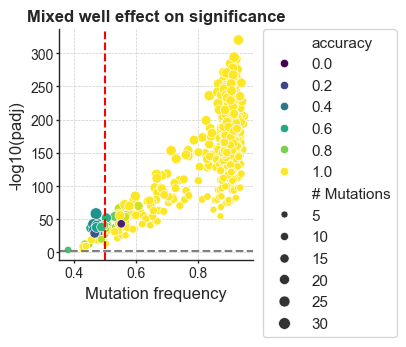

In [43]:
experiment_df = pd.read_csv(f'{data_dir}Experiment6_{label}.csv')

experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df.replace([np.inf, -np.inf], 320, inplace=True)

experiment_df['mixedWell'] = [int(c.split('_')[-1]) for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(str(v).split('_')) for v in experiment_df['Variant'].values]
#experiment_df['# Mutations'] = [f'{v}' if v < 5 else f'>=5' for v in experiment_df['# Mutations']]
experiment_df['Mixed Well'] = [c for c in experiment_df['Mixed Well'].values]

experiment_df = experiment_df.reset_index()
ax = sns.scatterplot(experiment_df, x='frequency', y='-log10(P.adj)', hue='accuracy', palette='viridis', 
                     size="# Mutations")#]# , style_order=['1', '2', '3', '4', '>=5'], s=80)
set_ax_params(ax)
plt.xlabel('Mutation frequency')
plt.ylabel('-log10(padj)')
plt.title('Mixed well effect on significance', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.axvline(x = 0.5, color = 'red', linestyle = '--') #axis='y', 

plt.savefig(f'{fig_dir}Experiment6_version2_{label}.svg')
plt.show()

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_2425/3157137483.py:3: RuntimeWarning: divide by zero encountered in log10
  experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)


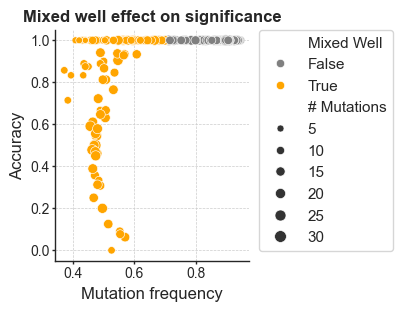

In [34]:
experiment_df = pd.read_csv(f'{data_dir}Experiment6_{label}.csv')

experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df.replace([np.inf, -np.inf], 320, inplace=True)

experiment_df['mixedWell'] = [int(c.split('_')[-1]) for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(str(v).split('_')) for v in experiment_df['Variant'].values]
#experiment_df['# Mutations'] = [f'{v}' if v < 5 else f'>=5' for v in experiment_df['# Mutations']]
experiment_df['Mixed Well'] = [c for c in experiment_df['Mixed Well'].values]

experiment_df = experiment_df.reset_index()
ax = sns.scatterplot(experiment_df, x='frequency', y='accuracy', hue='Mixed Well', palette=['grey', 'orange'], 
                     size="# Mutations")#]# , style_order=['1', '2', '3', '4', '>=5'], s=80)
set_ax_params(ax)
plt.xlabel('Mutation frequency')
plt.ylabel('Accuracy')
plt.title('Mixed well effect on significance', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.savefig(f'{fig_dir}Experiment6_{label}.svg')
plt.show()